In [1]:
import os
import numpy as np

from matplotlib import pyplot as plt
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets

In [2]:
from cellpose import plot, utils, io
from cellpose import models
from cellpose.io import imread
# locate and access input image files
# placed the file in the notebook folder. Docker is initialized in this folder and doesn't know about anything outside of it.
filename = "WT_data_sample_movie_3-1_single_timepoint.tif"
X_total = io.imread(filename)
print(np.shape(X_total))
print(np.shape(np.transpose(X_total,(0,2,3,1))))
X_total = np.transpose(X_total,(0,2,3,1))
X_total[:,:,:,[0,1]] = X_total[:,:,:,[1,0]] # swap 1,0 in 4th dimension to get nuclear channel in dimension 0, membrane in 1
X_total = X_total[190:200,:,:,:]
print(np.shape(X_total))


C:\Users\atata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████████████████████████████████████████████████████████████████████████| 670/670 [00:00<00:00, 1010.56it/s]


(335, 2, 601, 961)
(335, 601, 961, 2)
(10, 601, 961, 2)


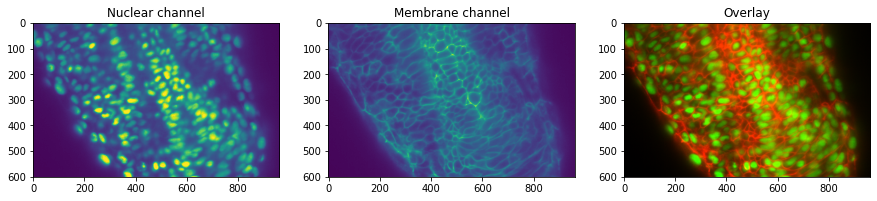

In [11]:
# select index for displaying
idx = 0

# plot the data
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(X_total[idx, ..., 0])
ax[1].imshow(X_total[idx, ..., 1])
ax[2].imshow(plot.image_to_rgb(X_total[idx,:,:,:], channels = [2,1]))

ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
ax[2].set_title('Overlay')

plt.show()

In [64]:
# make a prediction using cellpose, then compare overlay with the prediction on top
# maybe use show_segmentation function
#model = models.Cellpose(gpu=True, model_type='cyto')
model = models.Cellpose(gpu=True, model_type='cyto2') #makes more default segmentations, but lines are not as crisp as cyto
#model_new = models.CellposeModel(gpu=True, model_type='tissuenet') #doesn't get the membranes very well even with higher flow.
# tissuenet really feels more like a nuclear segmentator


46.783529069835936


C:\Users\atata\AppData\Local\Temp\ipykernel_59236\4125526437.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


47.18999855628097


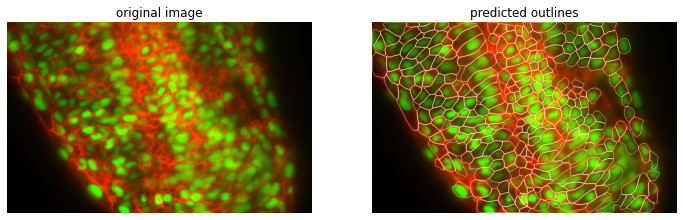

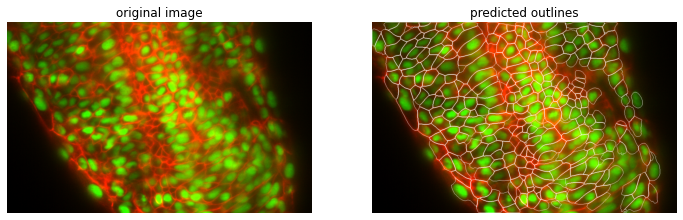

In [82]:
chan = [2,1]
diam=16 # open image in FIJI, draw line segment on a median sized cell, analyze > measure to get pixel count

#for i in range(0,np.size(X_total[:,0,0,0])):
for i in range(0,2):
    img = X_total[i,:,:,:]
    filename = "testResults/testCellposeSegmentation_" + str(i)
    masks, flows, styles, diams = model.eval(img, diameter=None, flow_threshold = 0.6, \
                                             cellprob_threshold = 0.0, min_size = 50, channels=chan)
    #masks, flows, styles = model_new.eval(img, diameter=diam, channels=chan, \
                                          #do_3D=False, flow_threshold = 2.0, resample=True, progress=True)
    print(diams)
    
    img0 = img.copy()
    if img0.shape[0] < 4:
        img0 = np.transpose(img0, (1,2,0))
    if img0.shape[-1] < 3 or img0.ndim < 3:
        img0 = plot.image_to_rgb(img0, channels=chan)
    else:
        if img0.max()<=50.0:
            img0 = np.uint8(np.clip(img0*255, 0, 1))
    
    fig2 = plt.figure(figsize=(12,5))
    ax = fig2.add_subplot(1,2,1)
    ax.imshow(img0)
    ax.set_title('original image')
    ax.axis('off')
    
    outlines = utils.masks_to_outlines(masks)
    overlay = plot.mask_overlay(img, masks)

    ax = fig2.add_subplot(1,2,2)
    outX, outY = np.nonzero(outlines)
    imgout = img0.copy()
    imgout[outX, outY] = np.array([255,255,255]) # pure white
    ax.imshow(imgout)
    
    ax.set_title('predicted outlines')
    ax.axis('off')
    fig2.show()
    fig2.savefig(filename+".jpg",dpi=300)

C:\Users\atata\AppData\Local\Temp\ipykernel_59236\287495146.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


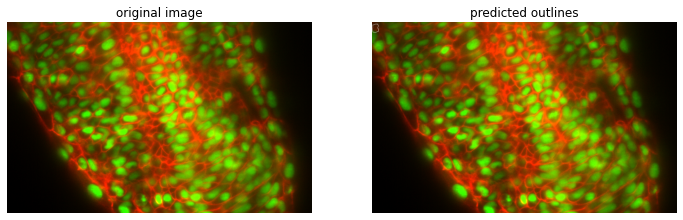

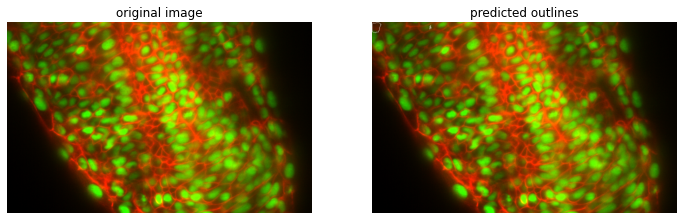

In [85]:
chan = [2,1]
diam=47 # open image in FIJI, draw line segment on a median sized cell, analyze > measure to get pixel count. 
# using the size model, cellpose wants diam=47 for a good segmentation. But when I do it in FIJI, I get 11.5. That's weird.
imgs = X_total
masks, flows, styles, diams = model.eval(imgs, diameter=diam, flow_threshold = 0.6, do_3D=True, \
                                             z_axis = 0, cellprob_threshold = 0.0, channels=chan)

#for i in range(0,np.size(X_total[:,0,0,0])):
for i in range(0,2):
    img = imgs[i]
    mask = masks[i]
    filename = "testResults/testCellposeSegmentation_" + str(i)
    
    #masks, flows, styles = model_new.eval(img, diameter=diam, channels=chan, \
                                          #do_3D=False, flow_threshold = 2.0, resample=True, progress=True)
    
    img0 = img.copy()
    if img0.shape[0] < 4:
        img0 = np.transpose(img0, (1,2,0))
    if img0.shape[-1] < 3 or img0.ndim < 3:
        img0 = plot.image_to_rgb(img0, channels=chan)
    else:
        if img0.max()<=50.0:
            img0 = np.uint8(np.clip(img0*255, 0, 1))
    
    fig2 = plt.figure(figsize=(12,5))
    ax = fig2.add_subplot(1,2,1)
    ax.imshow(img0)
    ax.set_title('original image')
    ax.axis('off')
    
    outlines = utils.masks_to_outlines(mask)
    overlay = plot.mask_overlay(img, mask)

    ax = fig2.add_subplot(1,2,2)
    outX, outY = np.nonzero(outlines)
    imgout = img0.copy()
    imgout[outX, outY] = np.array([255,255,255]) # pure white
    ax.imshow(imgout)
    
    ax.set_title('predicted outlines')
    ax.axis('off')
    fig2.show()
    fig2.savefig(filename+".jpg",dpi=300)

In [76]:
np.shape(masks[1])

(601, 961)